# Visualise Grid Rotation


103(G)
<gemmi.Position(58.355, 47.332, 91.116)> <gemmi.FloatGridBase.Point (56, 45, 90) -> -0.738496>
<gemmi.FloatGridBase.Point (50, 35, 77) -> -0.159635>


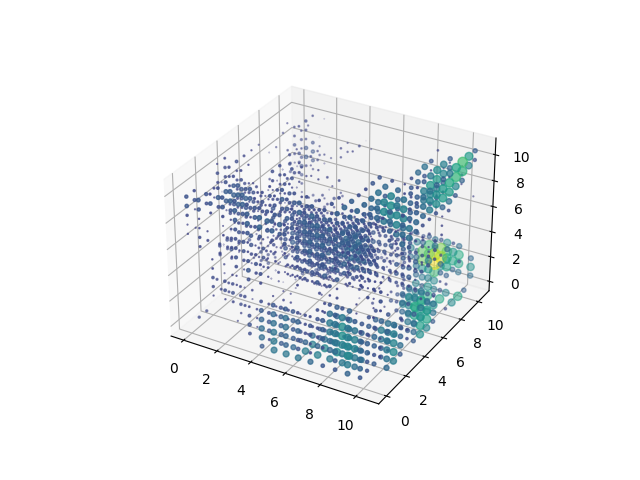

In [6]:
%matplotlib widget 

import matplotlib.pyplot as plt
from align_bases import * 
import gemmi 

shape = 16

# Read in structure and get residue
structure = gemmi.read_structure("data/pdb1hr2.ent")
residue = structure[0][0][0]

# Read in reflections and get normalised grid
mtz = gemmi.read_mtz_file("data/1hr2.mtz")
grid = mtz.transform_f_phi_to_map("FWT", "PHWT")
grid.normalize()

# Calculate Ax + By + Cz = d plane equation for residue
plane, position_list = get_base_plane(residue=residue)
A,B,C,D = plane
# Calculate rotation matrix to get plane to xy plane
rot_mat = get_rotation_matrix(plane)
# Calculate the start position of a n (shape) sized box around the center of the residue
base_start = get_res_start(residue, shape=shape)

base_start = grid.get_nearest_point(base_start)
print(residue[0].pos, grid.get_nearest_point(residue[0].pos))
print(base_start)

box = np.array(grid.get_subarray(
                [int(base_start.u),
                 int(base_start.v),
                 int(base_start.w)], shape=[shape, shape, shape]))

# Transform the atomic positions using rotation matrix
transformed_positions = [np.array(rot_mat.dot(x))[0] for x in position_list]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X,Y,Z = np.meshgrid(
    np.arange(0, box.shape[0])*0.7,
    np.arange(0, box.shape[1])*0.7,
    np.arange(0, box.shape[2])*0.7,
)

ax.scatter(X,Y,Z, s = 10*box, c = box)

plt.show()
